<a href="https://colab.research.google.com/github/sachinthadilshann/Temp_Forcasting/blob/main/Temp_ARIAM__70_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [737]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [738]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [739]:
import warnings
warnings.filterwarnings("ignore")

In [740]:
df = pd.read_csv("/content/drive/MyDrive/SLT/Se/temp.csv", sep=';')

In [741]:
df.head()

,"id;""device_id"";""sensor_value"";""timestamp"""
0,"2566;""Device0002a"";""1037.55"";""2023-07-11 07:38..."
1,"2567;""Device0002a"";""27.49"";""2023-07-11 07:38:21"""
2,"2568;""Device0002a"";""27.49"";""2023-07-11 07:38:22"""
3,"2569;""Device0002a"";""1037.55"";""2023-07-11 07:38..."
4,"2570;""Device0002a"";""27.05"";""2023-07-11 07:38:25"""


In [742]:
df[['id', 'device_id', 'sensor_value', 'timestamp']] = df['id;"device_id";"sensor_value";"timestamp"'].str.split(';', expand=True)

In [743]:
df.head()

,"id;""device_id"";""sensor_value"";""timestamp""",id,device_id,sensor_value,timestamp
0,"2566;""Device0002a"";""1037.55"";""2023-07-11 07:38...",2566,"""Device0002a""","""1037.55""","""2023-07-11 07:38:20"""
1,"2567;""Device0002a"";""27.49"";""2023-07-11 07:38:21""",2567,"""Device0002a""","""27.49""","""2023-07-11 07:38:21"""
2,"2568;""Device0002a"";""27.49"";""2023-07-11 07:38:22""",2568,"""Device0002a""","""27.49""","""2023-07-11 07:38:22"""
3,"2569;""Device0002a"";""1037.55"";""2023-07-11 07:38...",2569,"""Device0002a""","""1037.55""","""2023-07-11 07:38:23"""
4,"2570;""Device0002a"";""27.05"";""2023-07-11 07:38:25""",2570,"""Device0002a""","""27.05""","""2023-07-11 07:38:25"""


In [744]:
df['device_id'] = df['device_id'].str.strip('"')
df['sensor_value'] = df['sensor_value'].str.strip('"')
df['timestamp'] = df['timestamp'].str.strip('"')

In [745]:
df.drop('id;"device_id";"sensor_value";"timestamp"', axis=1, inplace=True)


In [746]:
df.drop('id', axis=1, inplace=True)

In [747]:
df.head()

,device_id,sensor_value,timestamp
0,Device0002a,1037.55,2023-07-11 07:38:20
1,Device0002a,27.49,2023-07-11 07:38:21
2,Device0002a,27.49,2023-07-11 07:38:22
3,Device0002a,1037.55,2023-07-11 07:38:23
4,Device0002a,27.05,2023-07-11 07:38:25


In [748]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     3124 non-null   object
 1   sensor_value  3124 non-null   object
 2   timestamp     3124 non-null   object
dtypes: object(3)
memory usage: 73.3+ KB


In [749]:
df.head()

,device_id,sensor_value,timestamp
0,Device0002a,1037.55,2023-07-11 07:38:20
1,Device0002a,27.49,2023-07-11 07:38:21
2,Device0002a,27.49,2023-07-11 07:38:22
3,Device0002a,1037.55,2023-07-11 07:38:23
4,Device0002a,27.05,2023-07-11 07:38:25


In [750]:
df['sensor_value'].astype(float)

0       1037.55
1         27.49
2         27.49
3       1037.55
4         27.05
         ...   
3119      29.97
3120      29.99
3121      29.99
3122      74.00
3123      74.00
Name: sensor_value, Length: 3124, dtype: float64

In [751]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [752]:
df.sort_values(by='timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)

In [753]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   device_id     3124 non-null   object        
 1   sensor_value  3124 non-null   object        
 2   timestamp     3124 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 73.3+ KB


In [754]:
df['sensor_value'] = df['sensor_value'].astype(float)

In [755]:
df['timestamp'].value_counts()

2023-07-11 08:12:20    5
2023-07-11 08:12:18    5
2023-07-11 08:02:36    4
2023-07-11 07:57:05    4
2023-07-11 07:58:59    4
                      ..
2023-07-12 09:04:01    1
2023-07-12 09:03:59    1
2023-07-12 09:03:57    1
2023-07-12 09:03:56    1
2023-07-13 06:53:46    1
Name: timestamp, Length: 2317, dtype: int64

In [756]:
df['device_id'] = df['device_id'].replace({"Device0001a": 1, "Device0002a": 0})


In [757]:
df['device_id'].value_counts()

1    3062
0      62
Name: device_id, dtype: int64

In [758]:
df = df.drop(df[(df['device_id'] == 0)].index)

In [759]:
df.head(100)

,device_id,sensor_value,timestamp
56,1,28.91,2023-07-11 07:55:50
57,1,28.79,2023-07-11 07:55:51
58,1,28.83,2023-07-11 07:55:51
59,1,28.83,2023-07-11 07:55:51
60,1,28.79,2023-07-11 07:55:52
...,...,...,...
151,1,28.53,2023-07-11 07:56:54
152,1,28.53,2023-07-11 07:56:54
153,1,28.59,2023-07-11 07:56:54
154,1,28.57,2023-07-11 07:56:55


In [760]:
df.head()

,device_id,sensor_value,timestamp
56,1,28.91,2023-07-11 07:55:50
57,1,28.79,2023-07-11 07:55:51
58,1,28.83,2023-07-11 07:55:51
59,1,28.83,2023-07-11 07:55:51
60,1,28.79,2023-07-11 07:55:52


In [761]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3062 entries, 56 to 3121
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   device_id     3062 non-null   int64         
 1   sensor_value  3062 non-null   float64       
 2   timestamp     3062 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 95.7 KB


In [762]:
df.head()

,device_id,sensor_value,timestamp
56,1,28.91,2023-07-11 07:55:50
57,1,28.79,2023-07-11 07:55:51
58,1,28.83,2023-07-11 07:55:51
59,1,28.83,2023-07-11 07:55:51
60,1,28.79,2023-07-11 07:55:52


In [763]:
df.drop('device_id', axis=1, inplace=True)

In [764]:
df.head(300)

,sensor_value,timestamp
56,28.91,2023-07-11 07:55:50
57,28.79,2023-07-11 07:55:51
58,28.83,2023-07-11 07:55:51
59,28.83,2023-07-11 07:55:51
60,28.79,2023-07-11 07:55:52
...,...,...
351,26.99,2023-07-11 07:58:51
352,26.99,2023-07-11 07:58:51
353,27.03,2023-07-11 07:58:52
354,27.09,2023-07-11 07:58:52


In [765]:
df.set_index('timestamp', inplace=True)

In [766]:
df.shape

(3062, 1)

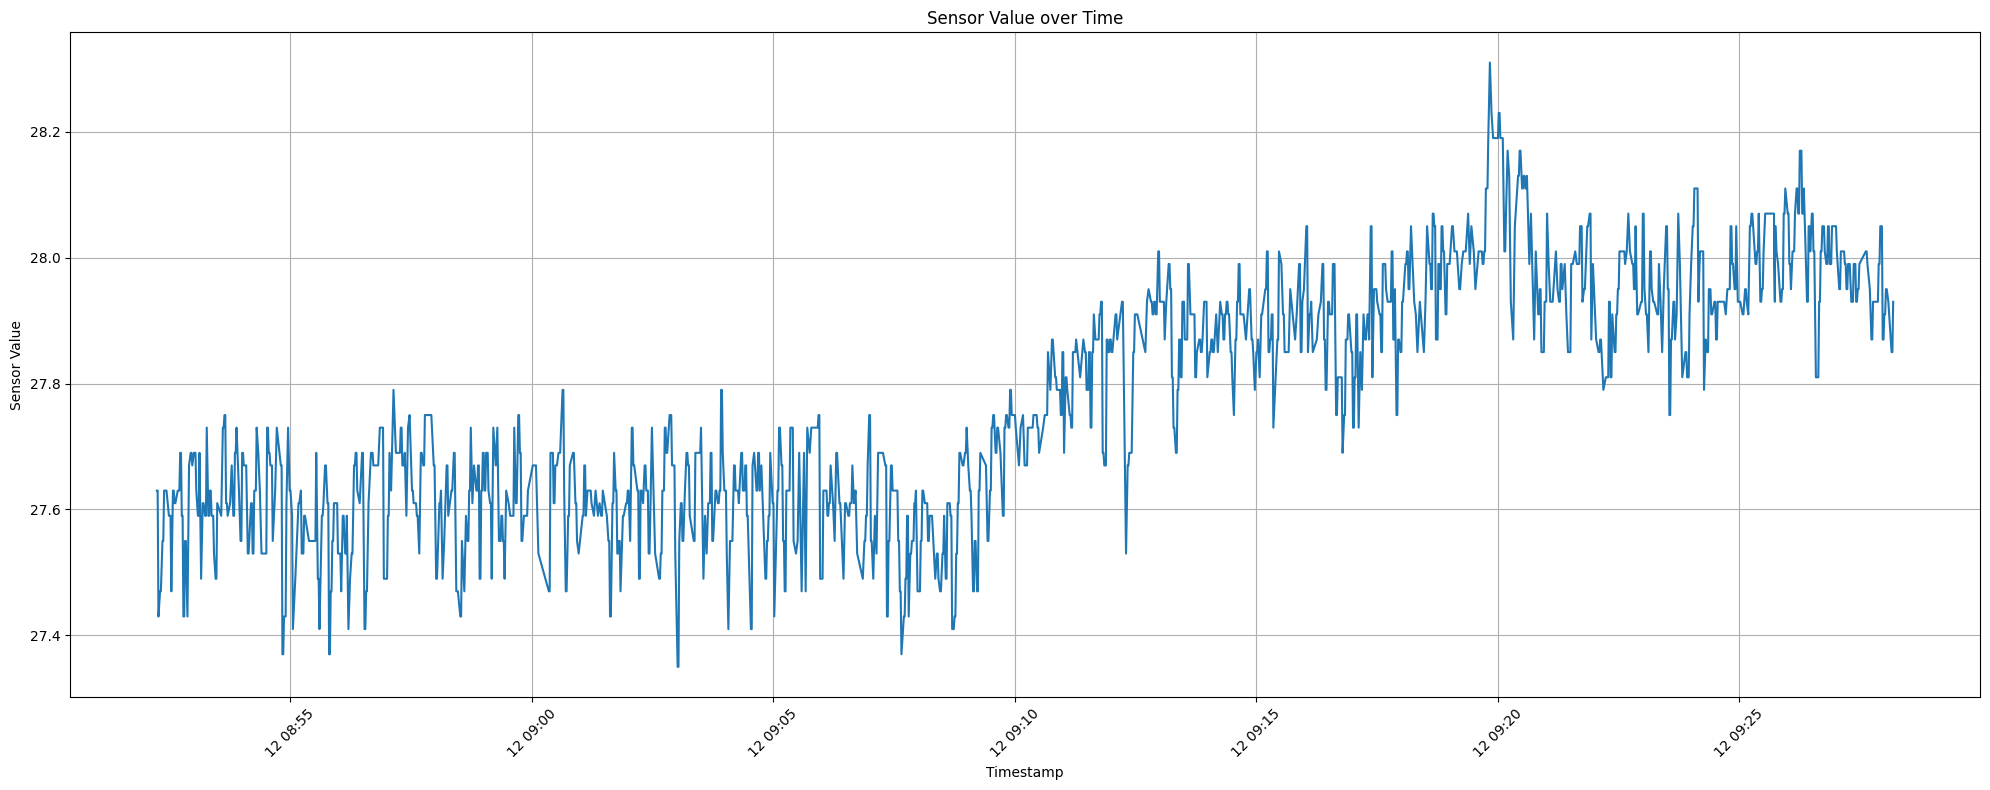

In [767]:
start_timestamp = '2023-07-12 08:40:00'
end_timestamp = '2023-07-12 09:30:27'
df = df.loc[start_timestamp:end_timestamp]


plt.figure(figsize=(20, 8))
plt.plot(df.index, df['sensor_value'])
plt.xlabel('Timestamp')
plt.ylabel('Sensor Value')
plt.title('Sensor Value over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [768]:
df.isnull().sum()

sensor_value    0
dtype: int64

In [769]:
df.shape

(1332, 1)

In [770]:
#df = df.iloc[1000:]
#df = df.iloc[:-1000]

In [771]:
df.shape

(1332, 1)

In [772]:
df.isnull().sum()

sensor_value    0
dtype: int64

In [773]:
df.head()

,sensor_value
timestamp,
2023-07-12 08:52:14,27.63
2023-07-12 08:52:15,27.63
2023-07-12 08:52:16,27.43
2023-07-12 08:52:18,27.47
2023-07-12 08:52:19,27.47


In [774]:
df.head(3000)

,sensor_value
timestamp,
2023-07-12 08:52:14,27.63
2023-07-12 08:52:15,27.63
2023-07-12 08:52:16,27.43
2023-07-12 08:52:18,27.47
2023-07-12 08:52:19,27.47
...,...
2023-07-12 09:28:03,27.95
2023-07-12 09:28:05,27.93
2023-07-12 09:28:09,27.85


In [775]:
#df['timestamp'] = pd.to_datetime(df['timestamp'])

In [776]:
df.shape

(1332, 1)

<Axes: xlabel='timestamp'>

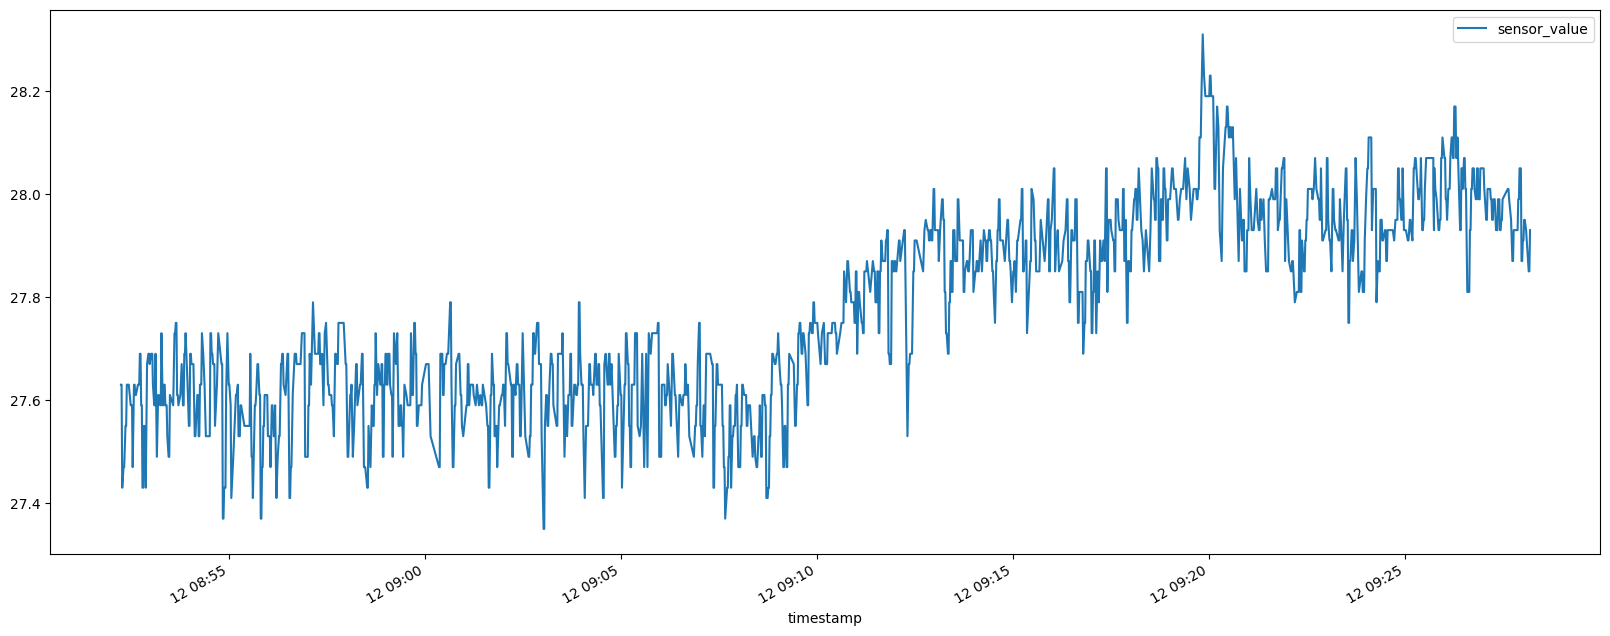

In [777]:
df.plot(figsize=(20, 8))

In [778]:
#df = df.resample('30S').mean()


In [779]:
#df['sensor_value'] = df['sensor_value'].fillna(0)


In [780]:
df.dropna(inplace=True)

<Axes: xlabel='timestamp'>

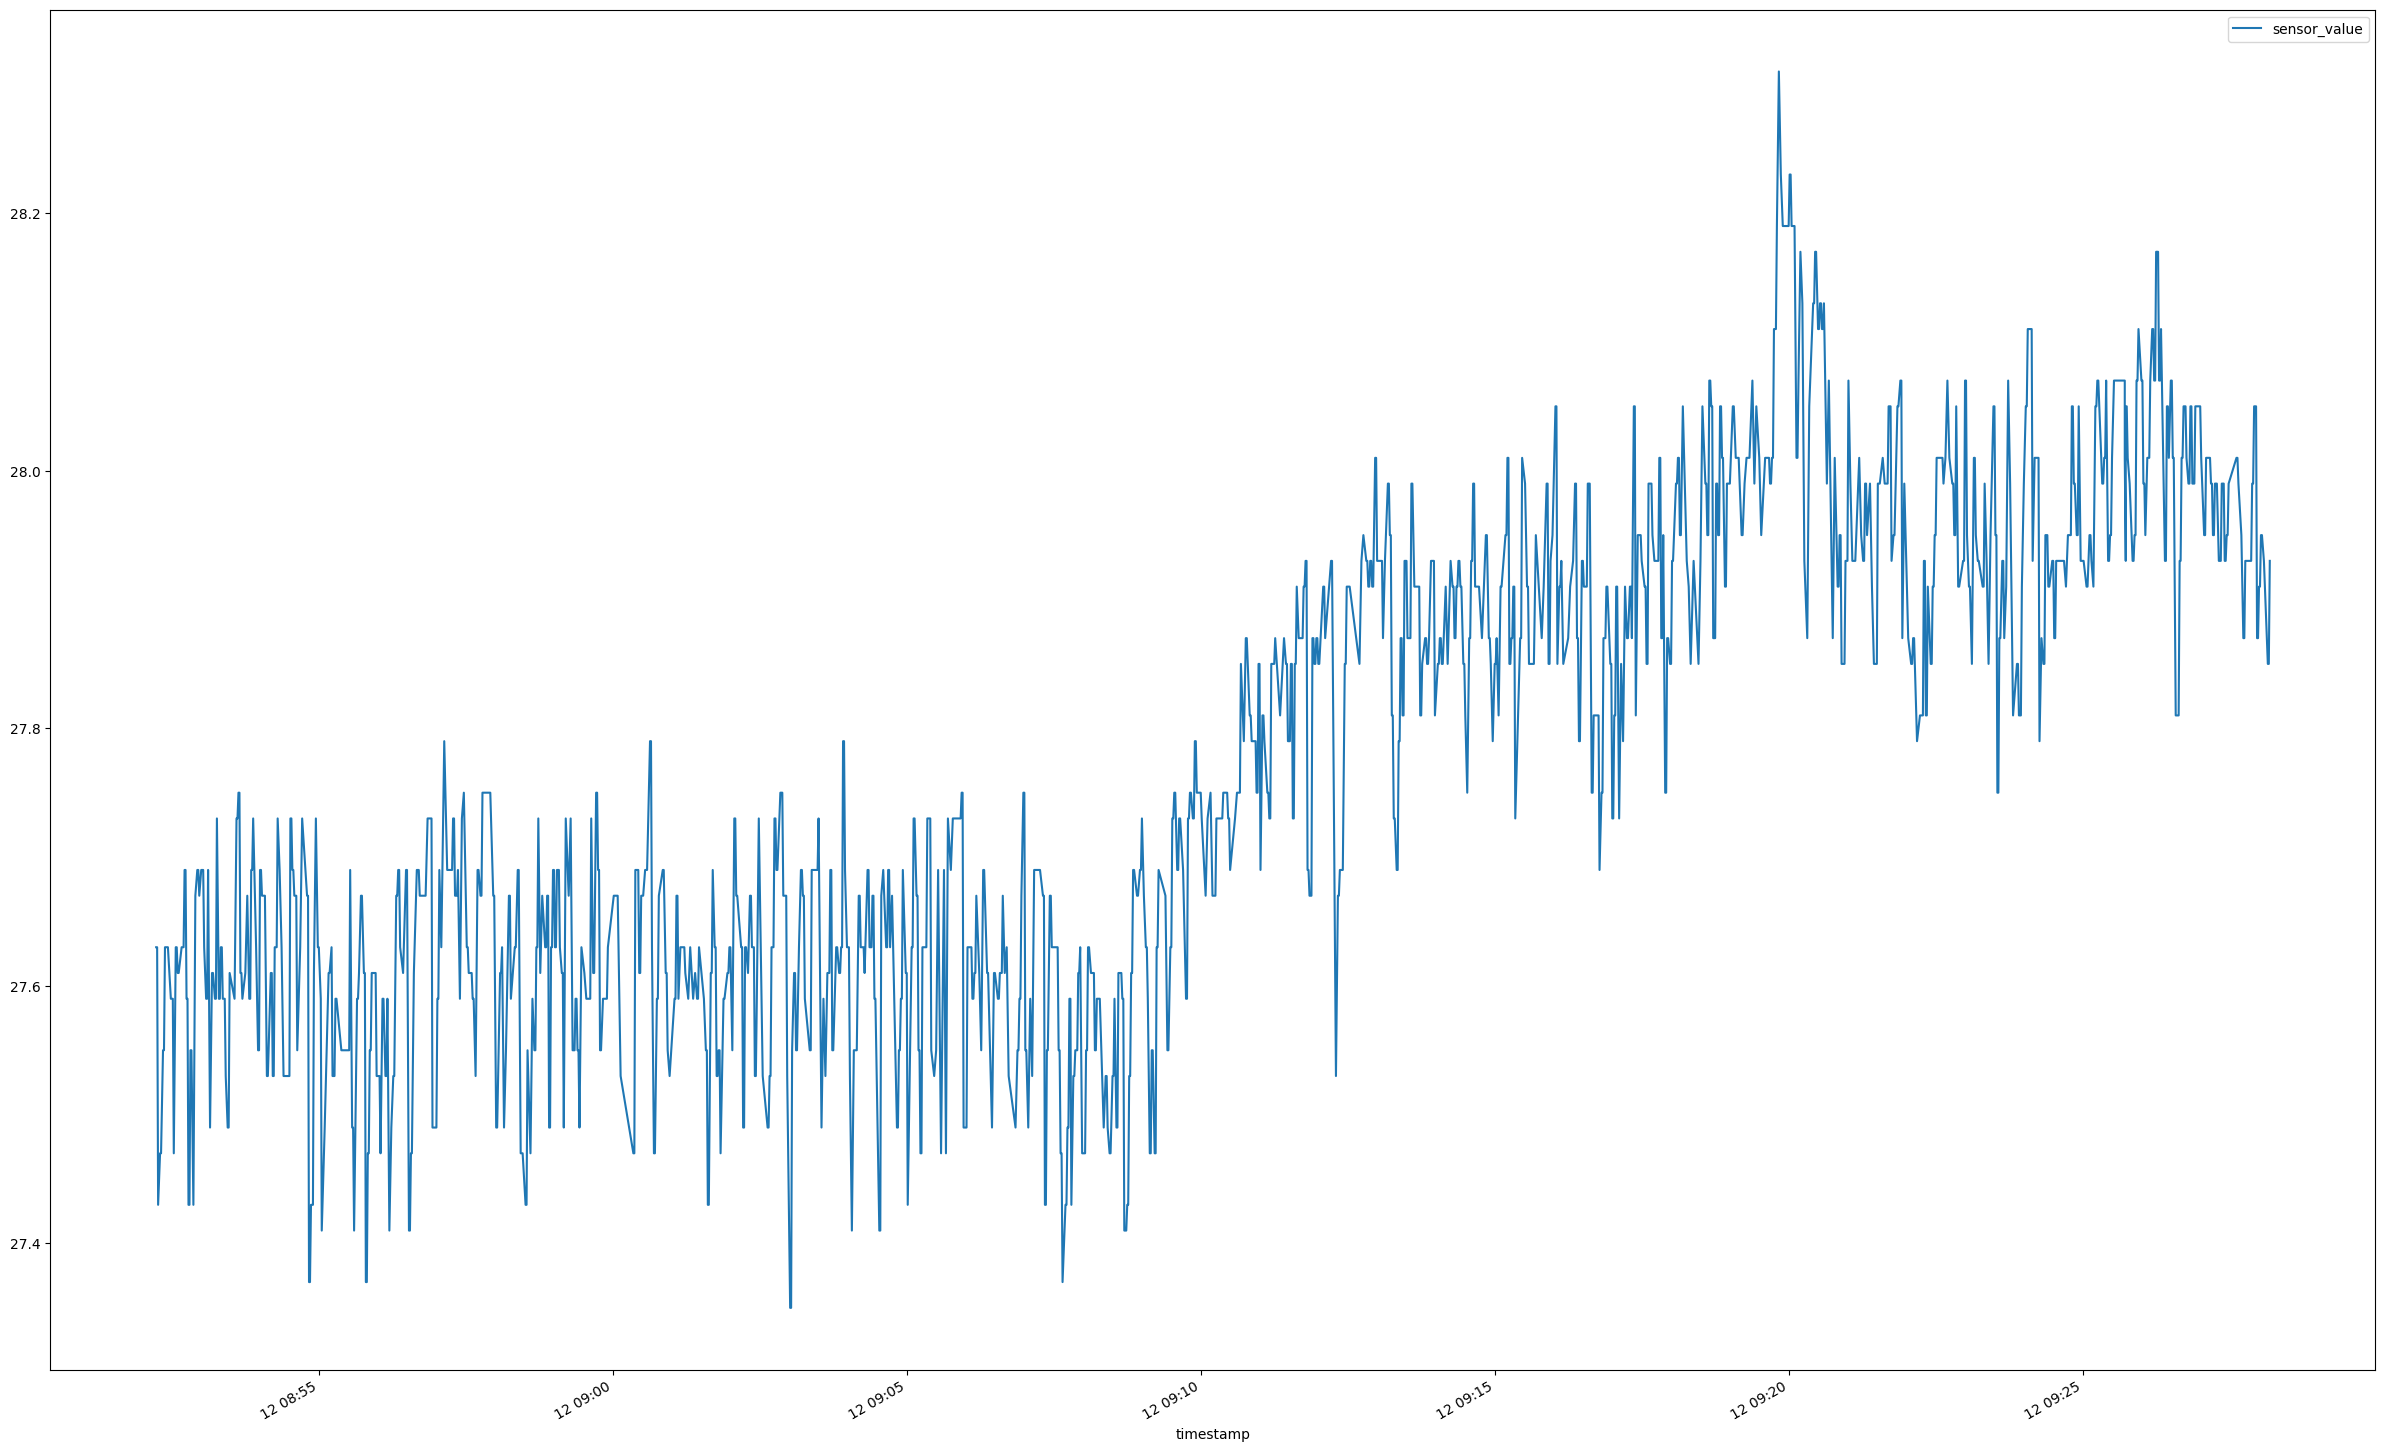

In [781]:
df.plot(figsize=(30, 20))

In [782]:
df.isnull().sum()

sensor_value    0
dtype: int64

In [783]:


from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)



In [784]:
adf_test(df['sensor_value'])


1. ADF :  -1.276024430664916
2. P-Value :  0.640068551759952
3. Num Of Lags :  20
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1311
5. Critical Values :
	 1% :  -3.4353478262263777
	 5% :  -2.863747134166378
	 10% :  -2.567945089732423


In [785]:
!pip install pmdarima

In [786]:
from pmdarima import auto_arima



In [787]:
stepwise_fit = auto_arima(df['sensor_value'],trace = True, suppress_warnings=True,stepwise = False,seasonal = False)
stepwise_fit.summary()

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3195.474, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3242.875, Time=0.43 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-3352.548, Time=1.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-3424.260, Time=1.79 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-3439.570, Time=2.93 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-3439.916, Time=6.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3226.574, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3438.476, Time=2.57 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3440.590, Time=2.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-3435.359, Time=2.58 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-3441.313, Time=7.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-3254.145, Time=0.47 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3434.441, Time=1.67 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3434.582, Time=3.52 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-3436.658, Time=2.38

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1332
Model:               SARIMAX(3, 1, 1)   Log Likelihood                1727.753
Date:                Fri, 03 Nov 2023   AIC                          -3443.506
Time:                        09:35:52   BIC                          -3412.344
Sample:                             0   HQIC                         -3431.828
                               - 1332                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0001      0.000      1.218      0.223   -8.04e-05       0.000
ar.L1          0.6103      0.030     20.036      0.000       0.551       0.670
ar.L2         -0.0309      0.031     -0.995      0.320      -0.092       0.030
ar.L3         -0.0662      0.029     -2.293      0.022      -0.123      -0.010
ma.L1         -0.9447      0.012    -79.154      0.000      -0.968      -0.921
sigma2         0.0044      0.000     31.018      0.000       0.004       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               275.25
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.63
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [788]:
from statsmodels.tsa.arima.model import ARIMA

#model = ARIMA(df, order=(2, 1, 5))
#model_fit = model.fit()

# Print the model summary
#print(model_fit.summary())


In [789]:
#forecast = model_fit.forecast(steps=50)
#print(forecast)

In [790]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [791]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a DataFrame 'df' with 'timestamp' and 'sensor_value' columns
# Replace 'df' with your actual DataFrame

# Set the index to the 'timestamp' column


# Extract the data values
X = df['sensor_value'].values

# Split the data into training and testing sets (80% training, 20% testing)
size = int(len(X) * 0.7)
train, test = X[:size], X[size:]

# Initialize a list to store the training data
history = [x for x in train]

# Initialize a list to store the predicted values
predictions = []

# Loop through the testing set to make predictions
for t in range(len(test)):
    model = ARIMA(history, order=(3, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Predicted: {yhat:.2f}, Expected: {obs:.2f}')

# Create a DataFrame for the predicted values with timestamps



Predicted: 27.90, Expected: 27.85
Predicted: 27.86, Expected: 27.85
Predicted: 27.86, Expected: 27.99
Predicted: 27.96, Expected: 27.99
Predicted: 27.96, Expected: 27.99
Predicted: 27.94, Expected: 27.95
Predicted: 27.92, Expected: 27.93
Predicted: 27.91, Expected: 27.93
Predicted: 27.92, Expected: 27.93
Predicted: 27.92, Expected: 28.01
Predicted: 27.97, Expected: 28.01
Predicted: 27.97, Expected: 27.87
Predicted: 27.88, Expected: 27.87
Predicted: 27.88, Expected: 27.95
Predicted: 27.94, Expected: 27.75
Predicted: 27.81, Expected: 27.75
Predicted: 27.81, Expected: 27.87
Predicted: 27.90, Expected: 27.87
Predicted: 27.89, Expected: 27.85
Predicted: 27.87, Expected: 27.85
Predicted: 27.87, Expected: 27.93
Predicted: 27.92, Expected: 27.93
Predicted: 27.92, Expected: 27.99
Predicted: 27.95, Expected: 27.99
Predicted: 27.95, Expected: 28.01
Predicted: 27.96, Expected: 28.01
Predicted: 27.96, Expected: 27.95
Predicted: 27.93, Expected: 27.95
Predicted: 27.93, Expected: 28.05
Predicted: 28.

In [792]:
pred_df = pd.DataFrame(predictions, index=df.index[size:size+len(test)], columns=['predicted_sensor_value'])

In [793]:
pred_df

,predicted_sensor_value
timestamp,
2023-07-12 09:17:35,27.897529
2023-07-12 09:17:36,27.861942
2023-07-12 09:17:37,27.862082
2023-07-12 09:17:38,27.956661
2023-07-12 09:17:40,27.956475
...,...
2023-07-12 09:28:03,27.956908
2023-07-12 09:28:05,27.955165
2023-07-12 09:28:09,27.939162


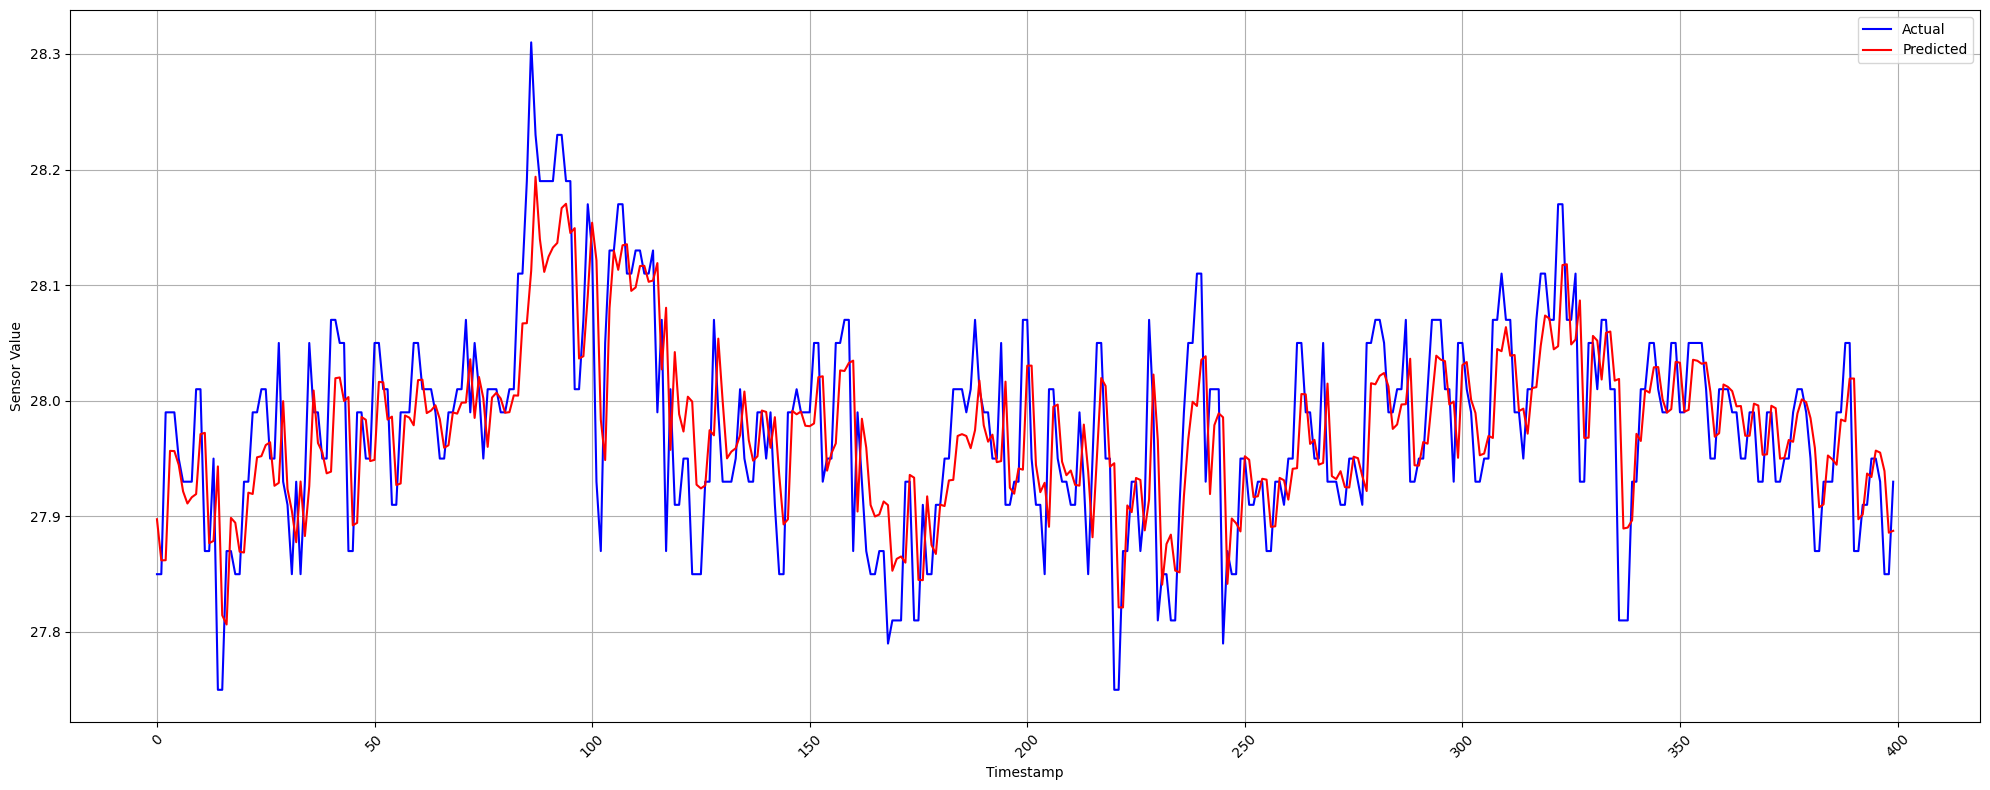

In [797]:
plt.figure(figsize=(20, 8))
plt.plot(test, color='blue', label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Sensor Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [795]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 0.061
